In [51]:
import importlib
import numpy as np

from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap, LocallyLinearEmbedding, MDS
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

import matplotlib.pyplot as plt

import cluster_ambiguity_clustme as cac
import visualize_gmm as vg

importlib.reload(cac)
importlib.reload(vg)

<module 'visualize_gmm' from '/home/hj/cluster-ambiguity/src/clustme_data/visualize_gmm.py'>

In [52]:
X, label = load_digits(return_X_y=True)
X_tsne = TSNE(n_components=2).fit_transform(X)
X_pca = PCA(n_components=2).fit_transform(X)
X_isomap = Isomap(n_components=2).fit_transform(X)
X_lle = LocallyLinearEmbedding(n_components=2).fit_transform(X)
X_lda = LinearDiscriminantAnalysis(n_components=2).fit_transform(X, label)

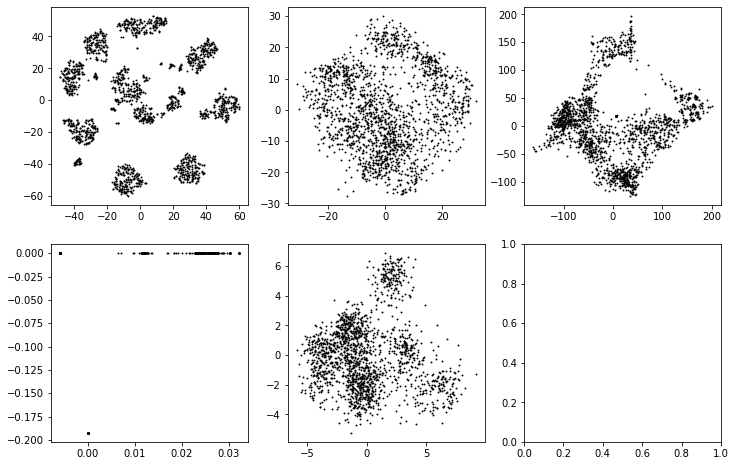

In [54]:
## visualize the X_tsne data as scatterplot
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
ax[0, 0].scatter(X_tsne[:, 0], X_tsne[:, 1], s=0.8, c="black")
ax[0, 1].scatter(X_pca[:, 0], X_pca[:, 1], s=0.8, c="black")
ax[0, 2].scatter(X_isomap[:, 0], X_isomap[:, 1], s=0.8, c="black")
ax[1, 0].scatter(X_lle[:, 0], X_lle[:, 1], s=0.8, c="black")
ax[1, 1].scatter(X_lda[:, 0], X_lda[:, 1], s=0.8, c="black")

0.8100188963338345


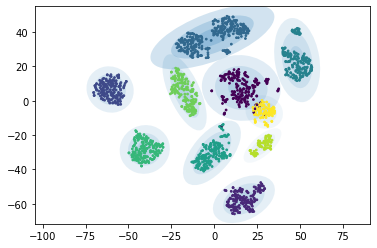

0.6179023156776869


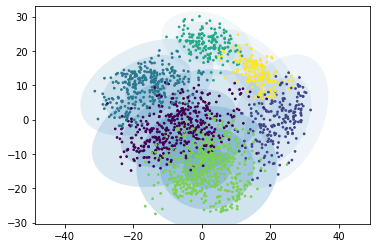

0.5565761558738065


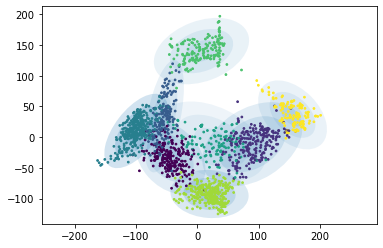

0.7947921694916052


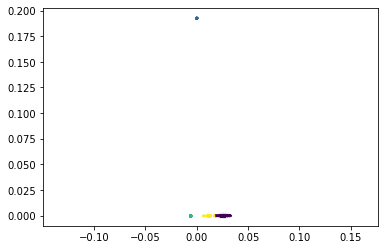

In [ ]:
def run(data):
	ca = cac.ClusterAmbiguity()
	score = ca.fit(data)
	print(score)
	vg.plot_gmm(ca.gmm, data, ca.gaussian_info["proba_labels"])
	plt.show()

run(X_tsne)
run(X_pca)
run(X_isomap)
run(X_lda)

0.375453151908855 0.35955903441504555 1.0442044726248279 0.6043806616216898


<AxesSubplot:>

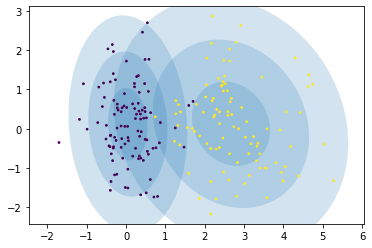

In [222]:
data = np.random.multivariate_normal((0,0), [[0.25,0],[0,0.8]], size=100)
data2 = np.random.multivariate_normal((2.5, 0), [[1,0],[0,1]], size=100)

## combine data and data2
data3 = np.concatenate((data, data2), axis=0)

ca = cac.ClusterAmbiguity()
ca.fit(data3)
vg.plot_gmm(ca.gmm, data3, ca.gaussian_info["proba_labels"])

In [170]:
import pandas as pd

df = pd.read_csv("./variables/variables.csv")

INPUT_ARR = [
	"rotation_diff", 
	"scaling_diff", 
	"mean_diff", 
	"scaling_size", 
	"scaling_size_diff",
	"mean_diff_scaling_ratio",
	"ellipticity_average",
	"ellipticity_diff",
	"density_diff",
	"density_average",
	"rotation_average",
	"gaussian_mean_vector_angle_diff",
	"gaussian_mean_vector_angle_average",
]

for key in INPUT_ARR:
	print(df[key].max(), end= " ")
	print(df[key].min())


2.738864812702434 -2.5506386361484776
0.2376909925687389 0.0007765010828066
0.8889496144805816 0.0029432636065723
0.5727154689821228 0.108790302989969
0.2328748974070149 2.4214440876302312e-06
7.252849514999064 0.0110718054049627
8.739791657120758 1.0357961513720677
12.124842605914548 0.0002588566047425
383561.9956720481 0.0
396258.74941472255 1082.9108648063216
2.7463472477263675 0.0032220361880079
2.480106509254687 6.76472928220484e-05
1.5590287152293023 -1.4581482582589942
